__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [19]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [6]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)
(b0, b1)

(444.1773573243596, 2.620538882402765)

In [14]:
x2 = salary.reshape(-1, 1)
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
y2 = scoring.reshape(-1, 1)

XTX = x2.T.dot(x2)
np.linalg.det(XTX)

349464.00000000023

In [15]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)
b

array([[444.17735732],
       [  2.62053888]])

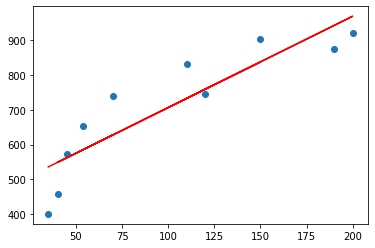

In [44]:
scoring_pred = b0 + b1 * salary

plt.scatter(salary, scoring)
plt.plot(salary, scoring_pred, color='red')

In [45]:
(scoring, scoring_pred)

(array([401., 574., 874., 919., 459., 739., 653., 902., 746., 832.]),
 array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
        548.99891262, 627.61507909, 585.68645697, 837.25818968,
        758.64202321, 732.43663439]))

In [17]:
# коэффициент детерминации
R1 = scoring_pred.var() / scoring.var()
(R1, np.corrcoef(salary, scoring) ** 2)

(0.7876386635293678, array([[1.        , 0.78763866],
        [0.78763866, 1.        ]]))

In [18]:
np.abs((scoring - scoring_pred) / scoring).mean()

0.11469251843561709

Значение средней ошибки аппроксимации превышает 10%, что говорит о том, что значения, полученные в модели линейной регрессии, отличаются от теоретических.

In [46]:
k1 = 1  # число факторов
k2 = salary.shape[0] - k1 - 1  # n - k1 - 1

T = (R1 / (1 - R1)) * (k2 / k1)
T

29.67164085966437

In [21]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.9646027437307145

$T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

In [22]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [23]:
s_slope = standard_error_slope(salary, scoring, scoring_pred)
s_slope

0.48108279568516005

In [24]:
T = b1 / s_slope
T

5.447168150485579

In [37]:
alpha = 0.05
n = salary.shape[0] - 2
t_crit = stats.t.ppf(1 - alpha/2.0, n)
t_crit

2.3060041350333704

Значение $T$ попало в критическую область, значит, гипотеза о равенстве нулю параметра $b_1$ отвергается.

Доверительный интервал для параметра $b_1$:

In [38]:
(b1 - t_crit * s_slope, b1 + t_crit * s_slope)

(1.5111599662593718, 3.729917798546158)

In [39]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [40]:
s_intercept = standard_error_intercept(salary, scoring, scoring_pred)
s_intercept

56.46649755068153

In [41]:
T = b0 / s_intercept
T

7.866210524668863

Значение $T$ попало в критическую область, значит, гипотеза о равенстве нулю параметра $b_1$ отвергается.

Доверительный интервал для параметра $b_0$:

In [43]:
(b0 - t_crit * s_intercept, b0 + t_crit * s_intercept)

(313.9653804816363, 574.3893341670829)

__Задача 2__

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Основной фактор заключается в известности дисперсии/ср.кв.отклонения: при неизвестной дисперсии для исследования используется распределение Стьюдента.

На выборках небольших объёмов при проверках гипотез также оптимальнее использовать распределение Стьюдента.

Также распределение Стюдента может использоваться, если необходимо определить выбросы и снизить их вес или исключить.